In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import numpy as np
import os
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# Veri seti yolu
train_dir = "/content/drive/MyDrive/dataset/breastjpg/train"
test_dir = "/content/drive/MyDrive/dataset/breastjpg/test"
categories = ["0_rs", "1_rs"]


# Örnek bir görseli kontrol etme
image_path = "/content/drive/MyDrive/dataset/breastjpg/test/1_rs/12153_1652537920_png.rf.cba80b05a9a3089c1554cfb383ce28bb.jpg"
image = cv2.imread(image_path)
if image is None:
    print(f"'{image_path}' yolundan görüntü yüklenemedi. Yol veya dosya adı hatalı olabilir.")
else:
    print("Görüntü başarıyla yüklendi.")


Görüntü başarıyla yüklendi.


In [4]:
# Veri artırma için ImageDataGenerator (Kaydetmeden eğitim sırasında kullanılacak)
train_datagen = ImageDataGenerator(
    rescale=1./255,          # Normalizasyon (0-255 -> 0-1 arası)
    rotation_range=30,       # Rastgele döndürme (0-30 derece)
    width_shift_range=0.2,   # Genişlik kaydırma (%20)
    height_shift_range=0.2,  # Yükseklik kaydırma (%20)
    shear_range=0.2,         # Kesme dönüşümü
    zoom_range=0.2,          # Rastgele zoom
    horizontal_flip=True,    # Yatay çevirme
    vertical_flip=True,      # Dikey çevirme
    fill_mode='nearest'      # Boş alanları doldurma yöntemi
)

In [5]:
def preprocess_images(image_dir, categories):
    images = []
    labels = []
    for category in categories:
        path = os.path.join(image_dir, category)
        label = categories.index(category)
        for img in os.listdir(path):
            try:
                img_path = os.path.join(path, img)
                image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Gri skala olarak yükle
                image = cv2.resize(image, (180, 180))  # Boyutlandırma
                image = image / 255.0  # Normalizasyon
                images.append(image)
                labels.append(label)
            except Exception as e:
                print(f"Görsel yüklenirken hata oluştu: {e}")
    images = np.array(images).reshape(-1, 180, 180, 1)  # Gri skala kanal boyutu ekle
    labels = np.array(labels)
    return images, labels


In [8]:
# Eğitim ve test verilerini yükleme ve ön işleme
gray_train_images, train_labels = preprocess_images(train_dir, categories)
gray_test_images, test_labels = preprocess_images(test_dir, categories)

In [9]:
# CNN Modeli
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # 2 sınıf
])

# Modeli derleme
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Modeli eğitme
history = model.fit(gray_train_images, train_labels, epochs=70, validation_data=(gray_test_images, test_labels), batch_size=32)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/70
75/75 ━━━━━━━━━━━━━━━━━━━━ 12s 78ms/step - accuracy: 0.6314 - loss: 0.6636 - val_accuracy: 0.6190 - val_loss: 0.6694
Epoch 2/70
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.6638 - loss: 0.6455 - val_accuracy: 0.6190 - val_loss: 0.6562
Epoch 3/70
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.6596 - loss: 0.6296 - val_accuracy: 0.6369 - val_loss: 0.6524
Epoch 4/70
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.6875 - loss: 0.6104 - val_accuracy: 0.6220 - val_loss: 0.6446
Epoch 5/70
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.6809 - loss: 0.6040 - val_accuracy: 0.6429 - val_loss: 0.6629
Epoch 6/70
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.7040 - loss: 0.5748 - val_accuracy: 0.6518 - val_loss: 0.6576
Epoch 7/70
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.7241 - loss: 0.5480 - val_accuracy: 0.6488 - val_loss: 0.6548
Epoch 8/70
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.7268 - loss: 0.5354 - val_accuracy: 0.6429 - 

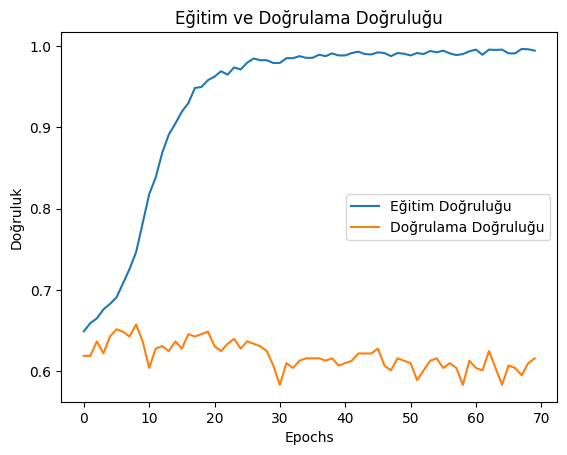

In [10]:
# Eğitim sonuçlarını görselleştirme
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epochs')
plt.ylabel('Doğruluk')
plt.legend()
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.show()

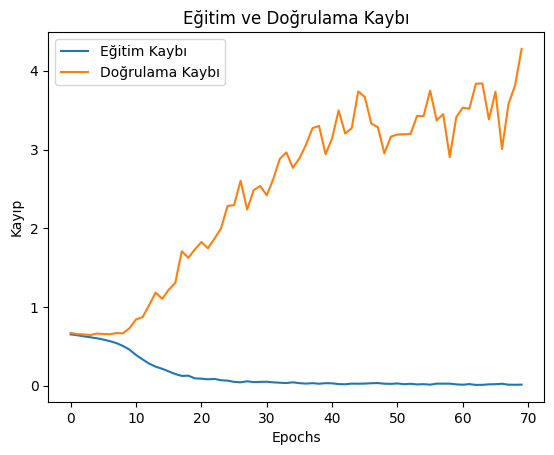

In [11]:
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epochs')
plt.ylabel('Kayıp')
plt.legend()
plt.title('Eğitim ve Doğrulama Kaybı')
plt.show()

In [12]:
# Test veri seti üzerinde tahmin yapma
predictions = model.predict(gray_test_images)

# Tahmin edilen sınıfları al
predicted_labels = np.argmax(predictions, axis=1)

print("Sınıflandırma Raporu:")
print(classification_report(test_labels, predicted_labels, target_names=categories))


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
Sınıflandırma Raporu:
              precision    recall  f1-score   support

        0_rs       0.66      0.77      0.71       208
        1_rs       0.49      0.36      0.42       128

    accuracy                           0.62       336
   macro avg       0.58      0.57      0.57       336
weighted avg       0.60      0.62      0.60       336



In [13]:
accuracy = accuracy_score(test_labels, predicted_labels)
precision = precision_score(test_labels, predicted_labels, average='weighted')
recall = recall_score(test_labels, predicted_labels, average='weighted')
f1 = f1_score(test_labels, predicted_labels, average='weighted')

print(f"Doğruluk (Accuracy): {accuracy}")
print(f"Duyarlılık (Precision): {precision}")
print(f"Hatırlama (Recall): {recall}")
print(f"F1 Skoru: {f1}")


Doğruluk (Accuracy): 0.6160714285714286
Duyarlılık (Precision): 0.5985789510281744
Hatırlama (Recall): 0.6160714285714286
F1 Skoru: 0.6005672949718861


In [14]:
print(model.input_shape)


(None, 180, 180, 1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


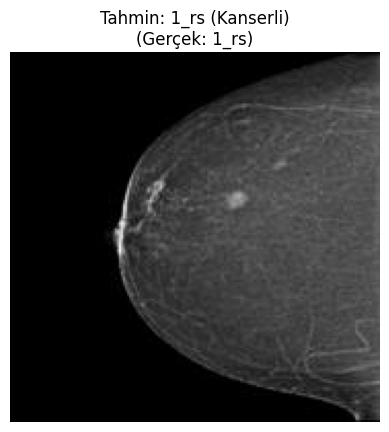

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import load_model

# Modeli yükle
model = load_model("breast_cancer_detection_model.h5")

# Test edilecek rastgele bir görüntü seç
random_idx = np.random.randint(0, len(gray_test_images))
test_image = gray_test_images[random_idx]  # (180,180) boyutunda gri kanal görüntü

# Görüntüyü model için uygun hale getir
input_image = test_image.reshape(1, 180, 180, 1)  # Model (None, 180, 180, 1) formatında bekliyor

# Model ile tahmin yap
prediction = model.predict(input_image)[0][0]  # Sigmoid çıktı olduğu için [0][0] ile değeri al

# Tahmini sınıfı belirle
predicted_class = "1_rs (Kanserli)" if prediction > 0.5 else "0_rs (Sağlıklı)"

# Görüntüyü göster
plt.imshow(test_image, cmap='gray')
plt.title(f"Tahmin: {predicted_class}\n(Gerçek: {categories[test_labels[random_idx]]})")
plt.axis('off')
plt.show()
